- Komang
- Bayu
- Yasmin

# **Import Library**

In [1]:
# Google Drive Public File/Folder Downloader
# https://pypi.org/project/gdown/
# https://github.com/wkentaro/gdown

!pip install -q -U gdown

In [2]:
import gdown
import numpy as np
import pandas as pd
import tensorflow as tf
# from tensorflow import keras
# from scipy.sparse import csr_matrix
# from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.feature_extraction.text import TfidfVectorizer

# **Import Dataset**

- [How to download Google Drive file using Gdown in Python](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-python)
- [How to download Google Drive file using Gdown in terminal command](https://github.com/wkentaro/gdown?tab=readme-ov-file#via-command-line)
- [How to use Python variable in Google Colab terminal command?](https://stackoverflow.com/questions/52851718/how-to-use-python-variables-in-google-colab-terminal-command)

In [3]:
# File ID from Google Drive link
base_url = "https://drive.google.com/uc?id={id}"
file_id = {
    "old_users_data"              : "16ngL0bfyQqucpYIffxkKiCa3qSGhR26S",
    "new_tourism_with_id_links"   : "10vsiQ3A3kxRkPrIR0rn_qR0ySZ368Pck",
    "new_tourism_rating_comments" : "1o-phm0eE64NulxzTLM_FWCyiMbfPHsYt",
    "package_tourism"             : "1LtPNXAnkJde03TFHJXqhIbKvtI_FXJxC"
}

# Download all the dataset file using gdown
for filename, id in file_id.items():
  gdown.download(id=id, output=f"{filename}.csv")      # Using Python
  # !gdown {base_url.format(id=id)} -O {filename}.csv  # Using terminal command

Downloading...
From: https://drive.google.com/uc?id=16ngL0bfyQqucpYIffxkKiCa3qSGhR26S
To: /content/old_users_data.csv
100%|██████████| 17.6k/17.6k [00:00<00:00, 33.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=10vsiQ3A3kxRkPrIR0rn_qR0ySZ368Pck
To: /content/new_tourism_with_id_links.csv
100%|██████████| 435k/435k [00:00<00:00, 34.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o-phm0eE64NulxzTLM_FWCyiMbfPHsYt
To: /content/new_tourism_rating_comments.csv
100%|██████████| 906k/906k [00:00<00:00, 23.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LtPNXAnkJde03TFHJXqhIbKvtI_FXJxC
To: /content/package_tourism.csv
100%|██████████| 9.89k/9.89k [00:00<00:00, 23.0MB/s]


In [4]:
# Load all dataset in Pandas DataFrame
user_df = pd.read_csv("old_users_data.csv")
tourism_df = pd.read_csv("new_tourism_with_id_links.csv")
rating_df = pd.read_csv("new_tourism_rating_comments.csv")
package_df = pd.read_csv("package_tourism.csv")

In [5]:
print("old_users_data.csv"),               display(user_df.sample(3)),     print("\n")
print("new_tourism_rating_comments.csv"),  display(rating_df.sample(3)),   print("\n")
print("package_tourism.csv"),              display(package_df.sample(3)),  print("\n")
print("new_tourism_with_id_links.csv"),    display(tourism_df.sample(3))

old_users_data.csv


,User_Id,Full_Name,Age,Email,Password
164,165,Harwilll Edensor,23,hedensor4k@bluehost.com,"qY9,YUxJW"
117,118,Lothaire Faire,32,lfaire39@xing.com,gV5$Kk~k/#y4d=uH
287,288,Shandy Kohrt,30,skohrt7z@rambler.ru,"wG2_""3zC'grHbP&z"




new_tourism_rating_comments.csv


,User_Id,Place_Id,Place_Ratings,Comment
2756,88,357,2,Wisata Alam Wana Wisata Penggaron kurang bikin...
681,23,260,4,"Seru banget liburan di Museum Pos Indonesia, m..."
3613,115,336,2,"Sayang banget Grand Maerakaca kurang terawat, ..."




package_tourism.csv


,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
70,71,Semarang,Wisata Lereng Kelir,Monumen Palagan Ambarawa,Benteng Pendem,Museum Kereta Ambarawa,Hutan Pinus Kayon
80,81,Surabaya,Taman Prestasi,Taman Keputran,Taman Bungkul,Taman Flora Bratang Surabaya,NaN




new_tourism_with_id_links.csv


,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
157,158,Pantai Pok Tunggal,"Bahari, Pulau","Pantai Pok Tunggal atau biasa disebut ""the hid...",Yogyakarta,10000,"4,5",NaN,"{'lat': -8.1554468, 'lng': 110.6217582}",-8.155447,110.621758,images_output\Pantai Pok Tunggal\Pantai Pok Tu...,images_output\Pantai Pok Tunggal\Pantai Pok Tu...,NaN
374,375,Kota Lama Semarang,"Budaya, Situs Sejarah","Kota Lama Semarang (bahasa Jawa: ꦏꦸꦛ​ꦭꦩ​ꦱꦼꦩꦫꦁ,...",Semarang,0,"4,7",90.0,"{'lat': -6.9681399, 'lng': 110.4278611}",-6.968140,110.427861,images_output\Kota Lama Semarang\Kota Lama Sem...,images_output\Kota Lama Semarang\Kota Lama Sem...,images_output\Kota Lama Semarang\Kota Lama Sem...
102,103,Tugu Pal Putih Jogja,"Budaya, Situs Sejarah, Museum Sejarah, Situs S...","Tugu Yogyakarta (Jawa: , Tugu Ngayogyakarta) a...",Yogyakarta,0,"4,7",15.0,"{'lat': -7.782943699999998, 'lng': 110.3670548}",-7.782944,110.367055,images_output\Tugu Pal Putih Jogja\Tugu Pal Pu...,images_output\Tugu Pal Putih Jogja\Tugu Pal Pu...,NaN


(None, None)

# **Data Assessment**


## **user_df**

In [6]:
user_df.sample(5)

,User_Id,Full_Name,Age,Email,Password
182,183,Uri Abramin,37,uabramin52@xinhuanet.com,dT5&9}sJ
86,87,Rivkah Demko,30,rdemko2e@wikia.com,"xN7<x?G""@F>"
272,273,Pris Melmar,33,pmelmar7k@yahoo.co.jp,zM9<Ebb7C{q9N)
90,91,Wynn Andrieux,32,wandrieux2i@simplemachines.org,tO5%OzB\3kIG9
196,197,Thornie Donnison,27,tdonnison5g@dropbox.com,rV8'l'apfo


In [7]:
print(user_df.info())
user_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_Id    300 non-null    int64 
 1   Full_Name  300 non-null    object
 2   Age        300 non-null    int64 
 3   Email      300 non-null    object
 4   Password   300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB
None


,0
User_Id,0
Full_Name,0
Age,0
Email,0
Password,0


## **tourism_df**

In [8]:
tourism_df.sample(3)

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Img_Path_0,Img_Path_1,Img_Path_2
12,13,Pulau Pramuka,"Bahari, Taman Laut",Pulau Pramuka merupakan salah satu pulau yang ...,Jakarta,5000,"4,2",NaN,"{'lat': -5.745962, 'lng': 106.6136577}",-5.745962,106.613658,images_output\Pulau Pramuka\Pulau Pramuka_0.jpg,images_output\Pulau Pramuka\Pulau Pramuka_1.jpg,images_output\Pulau Pramuka\Pulau Pramuka_2.jpg
335,336,Grand Maerakaca,"Taman Hiburan, Taman Rekreasi Anak",Masyarakat Jawa Tengah mungkin sudah tidak asi...,Semarang,15000,"4,4",NaN,"{'lat': -6.9605225, 'lng': 110.3863941}",-6.960522,110.386394,images_output\Grand Maerakaca\Grand Maerakaca_...,images_output\Grand Maerakaca\Grand Maerakaca_...,NaN
136,137,Wisata Alam Kalibiru,"Taman Hiburan, Taman Nasional, Cagar Alam",Kalibiru sebenarnya adalah sebuah nama hutan y...,Yogyakarta,20000,"4,4",90.0,"{'lat': -7.8057305, 'lng': 110.127969}",-7.805731,110.127969,images_output\Wisata Alam Kalibiru\Wisata Alam...,NaN,NaN


In [9]:
print(tourism_df.info())
tourism_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Category      437 non-null    object 
 3   Description   437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    object 
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Img_Path_0    437 non-null    object 
 12  Img_Path_1    358 non-null    object 
 13  Img_Path_2    166 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 47.9+ KB
None


,0
Place_Id,0
Place_Name,0
Category,0
Description,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [10]:
# Melihat semua kategori unik
categories_set = set()
for data in tourism_df['Category'].tolist():
  categories = data.split(', ')
  for category in categories:
    categories_set.add(category)

print(len(categories_set))
for index, data in enumerate(categories_set):
  print(index, data)

28
0 Taman Bertema
1 Pulau
2 Pasar Tradisional
3 Toko Cinderamata
4 Museum Sejarah
5 Pusat Perbelanjaan Mewah
6 Hutan Lindung
7 Teater & Pertunjukan
8 Water Park
9 Kebun Binatang
10 Taman Rekreasi Anak
11 Tempat Ibadah
12 Mall
13 Budaya
14 Warisan Arsitektur
15 Tempat Menyelam
16 Bahari
17 Pantai
18 Suaka Margasatwa
19 Situs Sejarah
20 Taman Edukasi
21 Cagar Alam
22 Taman Laut
23 Pusat Perbelanjaan
24 Taman Air
25 Museum Seni
26 Taman Hiburan
27 Taman Nasional


## **rating_df**

In [11]:
rating_df.sample(3)

,User_Id,Place_Id,Place_Ratings,Comment
4565,144,250,2,Pesona Nirwana Waterpark & Cottages tuh lokasi...
5028,159,316,4,"Keren, Curug Malela emang tempat liburan yang ..."
8004,251,331,2,Kurang puas sama pengalaman di Kyotoku Floatin...


In [12]:
print(rating_df.info())
rating_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User_Id        9597 non-null   int64 
 1   Place_Id       9597 non-null   int64 
 2   Place_Ratings  9597 non-null   int64 
 3   Comment        9597 non-null   object
dtypes: int64(3), object(1)
memory usage: 300.0+ KB
None


,0
User_Id,0
Place_Id,0
Place_Ratings,0
Comment,0


## **package_df**

In [13]:
print("package_tourism.csv")
print(package_df.info())
package_df.isnull().sum()

package_tourism.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB
None


,0
Package,0
City,0
Place_Tourism1,0
Place_Tourism2,0
Place_Tourism3,0
Place_Tourism4,34
Place_Tourism5,61


# **Data Cleaning**

In [14]:
# Fill missing Time_Minutes with the median
tourism_df.fillna({
    'Time_Minutes': tourism_df['Time_Minutes'].median()
}, inplace=True)

In [15]:
tourism_df.isnull().sum()

,0
Place_Id,0
Place_Name,0
Category,0
Description,0
City,0
Price,0
Rating,0
Time_Minutes,0
Coordinate,0
Lat,0


# **Data Transformation**

## **Create `tourism_one_hot_df`**

In [16]:
def get_one_hot_tourism_data(tourism_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
  """
  Preprocess the tourism dataframe by applying one-hot encoding to 'Category' and 'City',
  and dropping irrelevant columns.

  Args:
      tourism_df (pd.DataFrame): Original tourism dataframe.

  Returns:
      pd.DataFrame: Processed tourism dataframe with one-hot encoding applied.
  """
  # One-hot encoding untuk kolom Category dan City
  categories_one_hot = tourism_df['Category'].str.get_dummies(sep=', ')
  country_one_hot = tourism_df['City'].str.get_dummies()

  # Gabungkan dataframe asli dengan hasil one-hot encoding
  new_tourism_df = pd.concat([tourism_df, country_one_hot, categories_one_hot], axis=1)

  # Drop kolom yang tidak relevan
  tourism_one_hot_df = new_tourism_df.drop(columns=[
    'Place_Name', 'Category', 'Description', 'City', 'Coordinate',
    'Lat', 'Long', 'Img_Path_0', 'Img_Path_1', 'Img_Path_2'
  ])

  return tourism_one_hot_df, new_tourism_df

In [17]:
tourism_one_hot_df, new_tourism_df = get_one_hot_tourism_data(tourism_df)
tourism_one_hot_df

,Place_Id,Price,Rating,Time_Minutes,Bandung,Jakarta,Semarang,Surabaya,Yogyakarta,Bahari,...,Taman Hiburan,Taman Laut,Taman Nasional,Taman Rekreasi Anak,Teater & Pertunjukan,Tempat Ibadah,Tempat Menyelam,Toko Cinderamata,Warisan Arsitektur,Water Park
0,1,20000,"4,6",15.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,"4,6",90.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,270000,"4,6",360.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,10000,"4,5",60.0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,5,94000,"4,5",60.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,2000,"4,4",45.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
433,434,0,"4,6",60.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
434,435,0,"4,4",45.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
435,436,0,"4,6",60.0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [18]:
new_tourism_df.head(3)

,Place_Id,Place_Name,Category,Description,City,Price,Rating,Time_Minutes,Coordinate,Lat,...,Taman Hiburan,Taman Laut,Taman Nasional,Taman Rekreasi Anak,Teater & Pertunjukan,Tempat Ibadah,Tempat Menyelam,Toko Cinderamata,Warisan Arsitektur,Water Park
0,1,Monumen Nasional,"Budaya, Warisan Arsitektur",Monumen Nasional atau yang populer disingkat d...,Jakarta,20000,"4,6",15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,...,0,0,0,0,0,0,0,0,1,0
1,2,Kota Tua,"Budaya, Museum Seni","Kota tua di Jakarta, yang juga bernama Kota Tu...",Jakarta,0,"4,6",90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,...,0,0,0,0,0,0,0,0,0,0
2,3,Dunia Fantasi,"Taman Hiburan, Water Park",Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta,270000,"4,6",360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,...,1,0,0,0,0,0,0,0,0,1


## **Create `average_user_rating_df`**

In [19]:
def get_average_user_rating(new_tourism_df: pd.DataFrame, rating_df: pd.DataFrame) -> pd.DataFrame:
  """
  Calculate the average user ratings for tourism categories.

  This function preprocesses the tourism and rating dataframes to calculate
  the average ratings given by each user for various tourism categories.

  Args:
    new_tourism_df (pd.DataFrame): Dataframe containing tourism place
        information. It must include a 'Place_Id' column and one-hot
        encoded columns for tourism categories.
    rating_df (pd.DataFrame): Dataframe containing user ratings for places
      with columns 'Place_Id', 'User_Id', and 'Place_Ratings'.

  Returns:
    pd.DataFrame: A dataframe with average user ratings for each tourism
      category. The resulting dataframe includes:
        - 'User_Id': Unique identifier for users.
        - Columns corresponding to tourism categories with average ratings
          for each user.
    """

  # Daftar kategori
  categories = [
    'Bahari', 'Budaya', 'Cagar Alam', 'Hutan Lindung', 'Kebun Binatang',
    'Mall', 'Museum Sejarah', 'Museum Seni', 'Pantai', 'Pasar Tradisional',
    'Pulau', 'Pusat Perbelanjaan', 'Pusat Perbelanjaan Mewah', 'Situs Sejarah',
    'Suaka Margasatwa', 'Taman Air', 'Taman Bertema', 'Taman Edukasi',
    'Taman Hiburan', 'Taman Laut', 'Taman Nasional', 'Taman Rekreasi Anak',
    'Teater & Pertunjukan', 'Tempat Ibadah', 'Tempat Menyelam', 'Toko Cinderamata',
    'Warisan Arsitektur', 'Water Park'
  ]

  # Hapus kolom yang tidak diperlukan dari new_tourism_df
  tourism_category_only_one_hot_df = new_tourism_df.drop(columns=[
    'Place_Name', 'Category', 'Description', 'City', 'Price',
    'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long',
    'Img_Path_0', 'Img_Path_1', 'Img_Path_2', 'Bandung',
    'Jakarta', 'Semarang', 'Surabaya', 'Yogyakarta'
  ])

  # Gabungkan rating_df dengan tourism_category_only_one_hot_df berdasarkan 'Place_Id'
  rating_one_hot_df = rating_df.merge(
      tourism_category_only_one_hot_df, how='inner', on='Place_Id'
  )

  # Salin rating_one_hot_df untuk perhitungan
  rating_not_one_hot_df = rating_one_hot_df.copy()

  # Kalikan rating dengan setiap kategori untuk mendapatkan skor berbobot
  for category in categories:
    rating_not_one_hot_df[category] *= rating_not_one_hot_df['Place_Ratings']

  # Hitung total rating dan jumlah rating per kategori per pengguna
  total_count = rating_one_hot_df.groupby('User_Id')[categories].sum()
  total_rating = rating_not_one_hot_df.groupby('User_Id')[categories].sum()

  # Rata-rata rating untuk setiap kategori
  average_ratings = (total_rating / total_count).fillna(0).reset_index()

  # Tambahkan kolom User_Id ke hasil akhir
  average_user_rating_df = pd.concat([total_count.reset_index()[['User_Id']],
                                      average_ratings[categories]], axis=1)

  return average_user_rating_df

In [20]:
average_user_rating_df = get_average_user_rating(new_tourism_df, rating_df)
average_user_rating_df

,User_Id,Bahari,Budaya,Cagar Alam,Hutan Lindung,Kebun Binatang,Mall,Museum Sejarah,Museum Seni,Pantai,...,Taman Hiburan,Taman Laut,Taman Nasional,Taman Rekreasi Anak,Teater & Pertunjukan,Tempat Ibadah,Tempat Menyelam,Toko Cinderamata,Warisan Arsitektur,Water Park
0,1,2.000000,3.500000,3.444444,2.000000,5.0,0.0,3.750000,2.000000,0.0,...,3.800000,2.0,4.50,3.500000,2.500000,2.000000,0.000000,4.0,4.000000,0.000000
1,2,2.000000,3.444444,2.909091,2.333333,5.0,0.0,3.250000,5.000000,2.0,...,3.500000,0.0,3.00,2.666667,3.666667,4.000000,0.000000,0.0,2.000000,4.000000
2,3,5.000000,3.230769,4.000000,5.000000,0.0,0.0,3.200000,2.666667,0.0,...,3.000000,0.0,4.00,2.600000,3.500000,5.000000,5.000000,0.0,3.800000,4.000000
3,4,5.000000,3.076923,3.750000,3.000000,3.0,0.0,2.500000,5.000000,0.0,...,3.571429,5.0,5.00,4.000000,3.000000,0.000000,0.000000,0.0,2.714286,3.000000
4,5,3.500000,3.500000,3.000000,3.000000,2.0,0.0,3.200000,4.000000,5.0,...,3.500000,0.0,3.00,3.200000,3.000000,5.000000,0.000000,5.0,3.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,2.000000,3.000000,3.333333,0.000000,4.0,0.0,1.000000,3.000000,0.0,...,3.000000,2.0,0.00,2.500000,4.000000,2.500000,0.000000,2.0,2.500000,3.000000
296,297,3.333333,3.090909,3.000000,5.000000,2.5,0.0,2.500000,4.000000,3.5,...,4.125000,0.0,3.00,3.500000,4.000000,2.333333,3.333333,0.0,2.000000,0.000000
297,298,2.750000,4.200000,3.444444,0.000000,1.0,0.0,4.333333,4.000000,1.0,...,4.000000,0.0,3.75,5.000000,4.000000,2.000000,0.000000,0.0,0.000000,3.333333
298,299,2.000000,3.083333,2.250000,2.000000,0.0,0.0,2.800000,0.000000,0.0,...,2.428571,2.0,2.50,3.000000,2.666667,4.000000,0.000000,3.0,2.666667,1.000000


Persiapan Data untuk Model

In [21]:
# Convert numeric columns with commas to proper float format
tourism_one_hot_df = tourism_one_hot_df.replace(',', '.', regex=True)
tourism_one_hot_df = tourism_one_hot_df.apply(pd.to_numeric, errors='coerce')


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Drop non-relevant columns for training (e.g., Place_Id)
X = tourism_one_hot_df.drop(columns=['Place_Id'])

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0 (fallback value)
X = X.fillna(0)

# Normalize data column-wise
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X_normalized, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)



Shape of X_train: (349, 36)
Shape of X_test: (88, 36)


In [23]:
print(tourism_one_hot_df.columns)

Index(['Place_Id', 'Price', 'Rating', 'Time_Minutes', 'Bandung', 'Jakarta',
       'Semarang', 'Surabaya', 'Yogyakarta', 'Bahari', 'Budaya', 'Cagar Alam',
       'Hutan Lindung', 'Kebun Binatang', 'Mall', 'Museum Sejarah',
       'Museum Seni', 'Pantai', 'Pasar Tradisional', 'Pulau',
       'Pusat Perbelanjaan', 'Pusat Perbelanjaan Mewah', 'Situs Sejarah',
       'Suaka Margasatwa', 'Taman Air', 'Taman Bertema', 'Taman Edukasi',
       'Taman Hiburan', 'Taman Laut', 'Taman Nasional', 'Taman Rekreasi Anak',
       'Teater & Pertunjukan', 'Tempat Ibadah', 'Tempat Menyelam',
       'Toko Cinderamata', 'Warisan Arsitektur', 'Water Park'],
      dtype='object')


In [24]:
# Drop non-relevant columns, if they exist
if 'Place_Id' in tourism_one_hot_df.columns:
    tourism_one_hot_df = tourism_one_hot_df.drop(columns=['Place_Id'])



Karena tourism_one_hot_df memiliki 37 kolom, sedangkan model Anda mengharapkan 36 fitur sebagai input, maka ada 1 kolom tambahan yang perlu dihapus.

Arsitektur Model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dropout(0.2),  # Regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dense(X_train.shape[1], activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           2,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 36)                  │           1,188 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,636 (22.02 KB)

 Trainable params: 5,636 (22.02 KB)

 Non-trainable params: 0 (0.00 B)

Melatih Model

In [59]:
# Train the model
history = model.fit(
    X_train, X_train,  # Input and output are the same for autoencoder
    epochs=200,
    batch_size=16,
    validation_data=(X_test, X_test),
    verbose=1
)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0729 - loss: 0.2350 - val_accuracy: 0.0455 - val_loss: 0.2062
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0209 - loss: 0.1925 - val_accuracy: 0.0000e+00 - val_loss: 0.1389
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0085 - loss: 0.1234 - val_accuracy: 0.0000e+00 - val_loss: 0.0847
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0109 - loss: 0.0795 - val_accuracy: 0.0000e+00 - val_loss: 0.0720
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0088 - loss: 0.0695 - val_accuracy: 0.0000e+00 - val_loss: 0.0670
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0199 - loss: 0.0641 - val_accuracy: 0.0227 - val_loss: 0.0623
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0466 - loss: 0.0604 - val_accuracy: 0.0682 - val_loss: 0.0578
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1103 - loss: 0.0550 - val_accu

Visualisasi Hasil Pelatihan


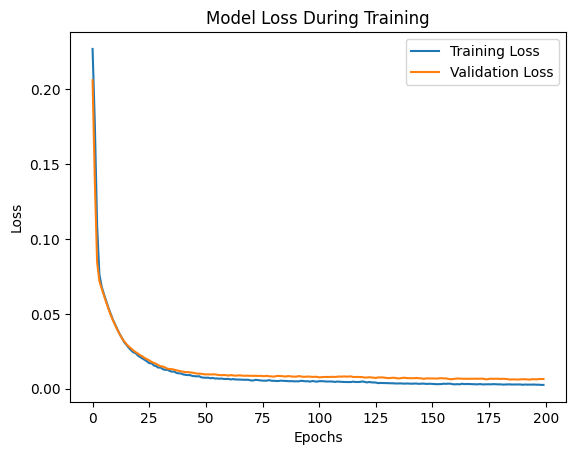

In [60]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

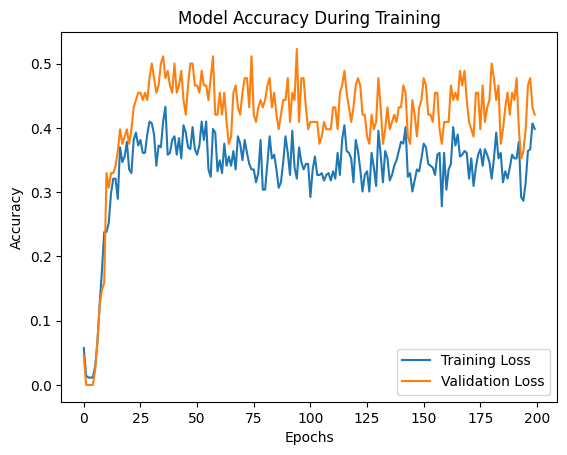

In [61]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Cek untuk meyakinkan ada apa saja di place name

In [62]:
tourism_df.columns
tourism_df['Place_Name'].head()


,Place_Name
0,Monumen Nasional
1,Kota Tua
2,Dunia Fantasi
3,Taman Mini Indonesia Indah (TMII)
4,Atlantis Water Adventure


Fungsi untuk Menghasilkan Rekomendasi

In [63]:
def generate_recommendations(place_name, model, tourism_one_hot_df, tourism_df, k=5):
    """
    Generate content-based recommendations using the trained model.

    Args:
    - place_name (str): The name of the place to base recommendations on.
    - model (tf.keras.Model): The trained model.
    - one_hot_data (pd.DataFrame): The one-hot encoded dataframe without 'Place_Name'.
    - tourism_df (pd.DataFrame): The original dataframe with 'Place_Name'.
    - k (int): Number of recommendations.

    Returns:
    - pd.DataFrame: Recommended places with similarity scores and names.
    """
    # Validate if the place_name exists in the dataset
    if place_name not in tourism_df['Place_Name'].values:
        raise ValueError(f"Place name '{place_name}' not found in the dataset.")

    # Get the index of the place
    place_idx = tourism_df[tourism_df['Place_Name'] == place_name].index[0]

    # Get the input vector for the place
    input_vector = tourism_one_hot_df.iloc[place_idx].values.astype('float32').reshape(1, -1)

    # Predict using the model
    predicted_vector = model.predict(input_vector)

    # Compute similarity scores
    similarity_scores = cosine_similarity(predicted_vector, tourism_one_hot_df.values.astype('float32')).flatten()

    # Get the top-k most similar places
    similar_indices = similarity_scores.argsort()[-k:][::-1]

    # Return the top-k recommendations with 'Place_Name'
    recommendations = tourism_df.iloc[similar_indices][['Place_Name']].copy()
    recommendations['Similarity_Score'] = similarity_scores[similar_indices]
    return recommendations


Cek model input shape sudah sesuai dengan kolom tourism one hot

In [64]:
print("Model input shape:", model.input_shape)


Model input shape: (None, 36)


In [65]:
print("Shape of tourism_one_hot_df:", tourism_one_hot_df.shape)


Shape of tourism_one_hot_df: (437, 36)


Sudah sesuai sama sama 36

In [66]:
place_to_recommend = "Monumen Nasional"  # Pastikan nama ini ada dalam dataset
recommendations = generate_recommendations(place_to_recommend, model, tourism_one_hot_df, tourism_df, k=10)
recommendations[['Place_Name', 'Similarity_Score']]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


,Place_Name,Similarity_Score
43,Monumen Selamat Datang,0.494736
102,Tugu Pal Putih Jogja,0.469897
427,Monumen Bambu Runcing Surabaya,0.469319
421,Monumen Jalesveva Jayamahe,0.469319
398,Taman Pelangi,0.468482
408,Rumah Batik,0.467779
25,Pecinan Glodok,0.465777
78,Taman Spathodea,0.455049
431,Taman Mundu,0.440559
402,Taman Barunawati,0.438479


REKOMENDASI BERDASARKAN KATEGORI

In [67]:
def generate_recommendations_by_category(category, model, one_hot_data, tourism_df, k=5):
    """
    Generate content-based recommendations based on a category.

    Args:
    - category (str): The category to base recommendations on.
    - model (tf.keras.Model): The trained model.
    - one_hot_data (pd.DataFrame): The one-hot encoded dataframe without 'Place_Name'.
    - tourism_df (pd.DataFrame): The original dataframe with 'Place_Name' and 'Category'.
    - k (int): Number of recommendations.

    Returns:
    - pd.DataFrame: Recommended places with similarity scores and additional details.
    """
    # Validate if the category exists in the dataset
    if category not in tourism_df['Category'].values:
        raise ValueError(f"Category '{category}' not found in the dataset.")

    # Filter tourism_df to include only rows with the given category
    filtered_places = tourism_df[tourism_df['Category'].str.contains(category, case=False, na=False)]

    # Get indices of filtered places
    filtered_indices = filtered_places.index

    # Create an average feature vector for the given category
    category_vector = one_hot_data.iloc[filtered_indices].mean(axis=0).values.astype('float32').reshape(1, -1)

    # Predict using the model
    predicted_vector = model.predict(category_vector)

    # Compute similarity scores with all destinations
    similarity_scores = cosine_similarity(predicted_vector, one_hot_data.values.astype('float32')).flatten()

    # Get the top-k most similar places
    similar_indices = similarity_scores.argsort()[-k:][::-1]

    # Return the top-k recommendations with additional details
    recommendations = tourism_df.iloc[similar_indices].copy()
    recommendations['Similarity_Score'] = similarity_scores[similar_indices]
    return recommendations



In [ ]:
# Example: Generate recommendations
category_to_recommend = "Budaya"  # Replace with any category in the dataset
recommendations_by_category = generate_recommendations_by_category(category_to_recommend, model, tourism_one_hot_df, tourism_df, k=5)

# Display recommendations with additional details
recommendations_by_category[['Place_Name', 'City', 'Category', 'Similarity_Score']]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


,Place_Name,City,Category,Similarity_Score
43,Monumen Selamat Datang,Jakarta,"Budaya, Warisan Arsitektur",0.297201
102,Tugu Pal Putih Jogja,Yogyakarta,"Budaya, Situs Sejarah, Museum Sejarah, Situs S...",0.296608
421,Monumen Jalesveva Jayamahe,Surabaya,"Budaya, Museum Seni",0.291420
427,Monumen Bambu Runcing Surabaya,Surabaya,"Budaya, Warisan Arsitektur",0.291420
408,Rumah Batik,Surabaya,"Budaya, Teater & Pertunjukan",0.285606


Rekomendasi Berdasarkan Rating

In [68]:
def generate_recommendations_by_rating(rating, model, one_hot_data, tourism_df, k=5):
    """
    Generate content-based recommendations based on a given rating.

    Args:
    - rating (float): The rating to base recommendations on.
    - model (tf.keras.Model): The trained model.
    - one_hot_data (pd.DataFrame): The one-hot encoded dataframe without 'Place_Name'.
    - tourism_df (pd.DataFrame): The original dataframe with 'Place_Name' and 'Rating'.
    - k (int): Number of recommendations.

    Returns:
    - pd.DataFrame: Recommended places with similarity scores and additional details.
    """
    # Validate if the rating exists in the dataset
    if rating not in tourism_df['Rating'].values:
        raise ValueError(f"Rating '{rating}' not found in the dataset.")

    # Filter tourism_df to include only rows with the given rating
    filtered_places = tourism_df[tourism_df['Rating'] == rating]

    # Get indices of filtered places
    filtered_indices = filtered_places.index

    # Create an average feature vector for the given rating
    rating_vector = one_hot_data.iloc[filtered_indices].mean(axis=0).values.astype('float32').reshape(1, -1)

    # Predict using the model
    predicted_vector = model.predict(rating_vector)

    # Compute similarity scores with all destinations
    similarity_scores = cosine_similarity(predicted_vector, one_hot_data.values.astype('float32')).flatten()

    # Get the top-k most similar places
    similar_indices = similarity_scores.argsort()[-k:][::-1]

    # Return the top-k recommendations with additional details
    recommendations = tourism_df.iloc[similar_indices].copy()
    recommendations['Similarity_Score'] = similarity_scores[similar_indices]
    return recommendations


In [69]:
# Contoh Percobaan: Menggunakan fungsi untuk rating tertentu
rating_to_recommend = 4,6 # Ganti dengan rating yang ada di dataset
recommendations_by_rating = generate_recommendations_by_rating(
    rating=rating_to_recommend,
    model=model,
    one_hot_data=tourism_one_hot_df,
    tourism_df=tourism_df,
    k=5
)

# Tampilkan hasil rekomendasi
print(recommendations_by_rating[['Place_Name', 'City', 'Rating', 'Similarity_Score']])


ValueError: operands could not be broadcast together with shapes (437,) (2,) 